In [9]:
%cd /content/drive/MyDrive/Autograd from scratch

import matplotlib.pyplot as plt
import simplegrad.nn
import simplegrad.optim
import random

random.seed(10)

/content/drive/MyDrive/Autograd from scratch


In [2]:


model = simplegrad.nn.Sequential(
                    simplegrad.nn.Linear(3, 4), # 3*4+4 = 16 params
                    simplegrad.nn.ReLU(0.1),
                    simplegrad.nn.Linear(4, 2), # 4*4+4 = 20 params
                    simplegrad.nn.ReLU(0.1),
                    simplegrad.nn.Linear(2, 1), # 4*1+1 = 5 params
                    simplegrad.nn.ReLU(0.1)
                   )
optimizer = simplegrad.optim.SGD(model.parameters(), 0.1)
loss = simplegrad.nn.MSELoss()

In [3]:
x = [[2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0]]

# y = [[0,1],
#      [1,0],
#      [1,0],
#      [0,1]]
y = [1, -1, -1, 1]
# y = [1, 0, 0, 1]

In [4]:
def one_hot(y, num_classes=2, ):
    mapping = dict()
    for i in range(num_classes):
        mapping[i] = [0] * num_classes
        mapping[i][i] = 1

    return [mapping[i] for i in y]

one_hot([4,2,6,8,3,5,2], num_classes=9)

[[0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0]]

In [5]:
loss_hist = []
for epoch in range(100):

    output = [model(i)[0] for i in x]
    l = loss(output, y)

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    loss_hist.append(l.value)
print(f'training loss: {l.value}')

training loss: 0.0599008640921783


In [6]:
0.004434994887668771

0.004434994887668771

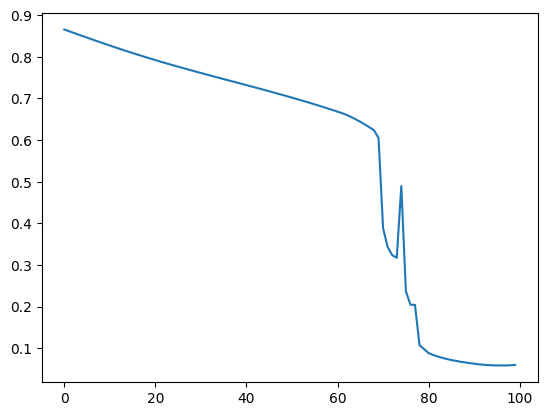

In [7]:
plt.plot(loss_hist)